# <font color=darkblue> Importing Packages

In [1]:
!pip install dltk_ai

     |████████████████████████████████| 51kB 2.6MB/s 


In [2]:
import os #file handling
import dltk_ai
from dltk_ai.dataset_types import Dataset     #importing datasets
from dltk_ai import visualization as vs #importing visualizations
from dltk_ai import preprocessor       #importing preprocessor
import json
from sklearn import datasets #Machine Learning 
import numpy as np #Numerical
import seaborn as sns #plot
import matplotlib.pyplot as plt #plot
from sklearn.model_selection import train_test_split #ML

# <font color=darkblue> Data

Loading the dataset and splitting it into 2 parts, train and test

In [3]:
import numpy as np
import pandas as pd
df =  preprocessor.read_csv('Life Expectancy Data.csv')
data, test_data = train_test_split(df, test_size=0.2,random_state = 42) 
test_data.dropna(inplace = True)
test_data.to_csv('Life Expectancy Data test.csv',index = False)

# <font color=darkblue> Sneak Peak at Dataset

Lets see what our data looks like

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
456,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
462,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
2667,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
381,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3


In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2342.000000,2342.000000,2350.000000,2192.000000,2350.000000,1911.000000,2350.000000,2323.000000,2350.000000,2336.000000,2165.000000,2336.000000,2350.000000,2005.000000,1.834000e+03,2323.000000,2323.000000,2219.000000,2221.000000
mean,2007.537447,69.277156,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,4.611986,9.572614,125.273598,111.836006,4.034828,1952.616462,24.821252,11589.618520,20.073857,152.939537,23.363327,2.509597,23.793441,5.266324,14189.942344,5.480387e+07,4.403585,4.482891,0.207573,3.346762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,0.850000,5.491010,77.000000,0.000000,19.400000,0.000000,78.000000,4.260000,78.000000,0.100000,462.517913,1.943552e+05,1.600000,1.500000,0.497000,10.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.760000,65.611455,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1774.929100,1.416448e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.700000,227.750000,20.750000,7.622500,441.534144,97.000000,356.250000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5859.915622,7.442611e+06,7.100000,7.100000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We can see that the data is not following normal distribution and, we also have nulls

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 456 to 860
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2350 non-null   object 
 1   Year                             2350 non-null   int64  
 2   Status                           2350 non-null   object 
 3   Life expectancy                  2342 non-null   float64
 4   Adult Mortality                  2342 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2192 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      1911 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2323 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio              

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            158
percentage expenditure               0
Hepatitis B                        439
Measles                              0
 BMI                                27
under-five deaths                    0
Polio                               14
Total expenditure                  185
Diphtheria                          14
 HIV/AIDS                            0
GDP                                345
Population                         516
 thinness  1-19 years               27
 thinness 5-9 years                 27
Income composition of resources    131
Schooling                          129
dtype: int64

Since we have a lot of nulls, we cannot simply drop them

In [8]:
print(data.columns)
print(data.shape)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
(2350, 22)


# <font color = 'darkblue'> Data preprocessing and Feature anlysis

## <font color = green> Correlation Analysis

Heatmap lets us see how different values are correlated, in a visual manner.

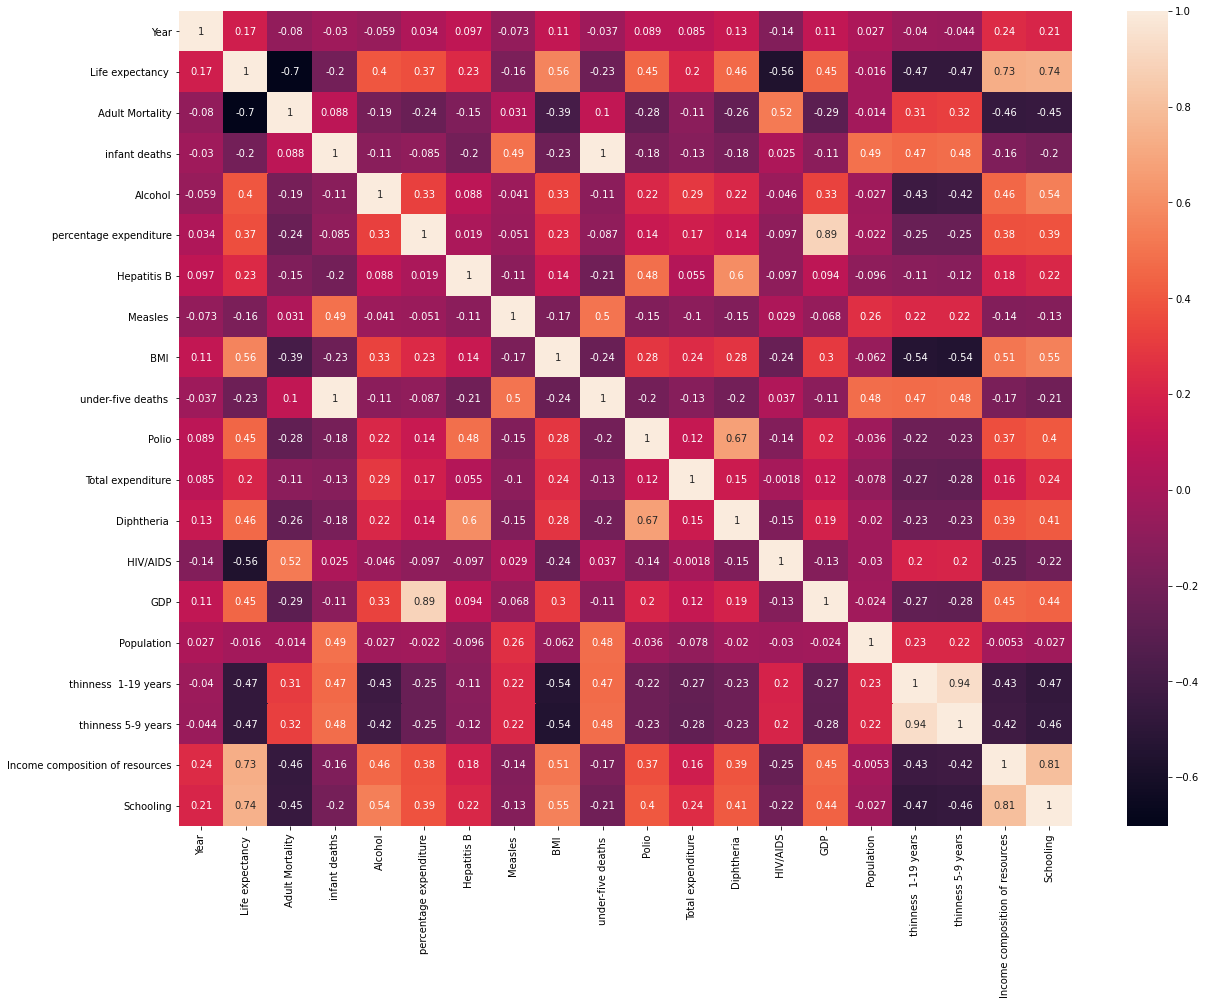

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)

## <font color = green> Handling Outliers and missing values

To fill the null values, imputation, grouped mean and dropping were used

Dropping the nulls which are very few in number

In [10]:
# removing null value of 'Adult Morality' and 'Life expectancy ' columns
data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())
data['Life expectancy ']=data['Life expectancy '].fillna(value=data['Life expectancy '].mean())

For imputation, first, the correlation was seen,. for example, column X is highly correlated to column Y.  Now, if column X has null values and column Y is filled fully, then column X can be filled using column Y 

If we see the scatter plot of X and Y we can see where majority of points fall and what is the relation

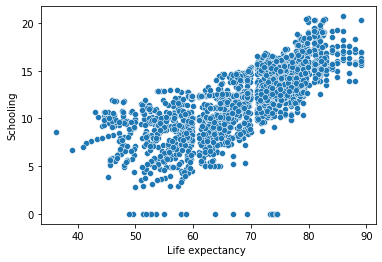

In [11]:
sns.scatterplot(data=data,x='Life expectancy ',y='Schooling')

In [12]:
# Imputing missing values of 'Schooling' column 
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

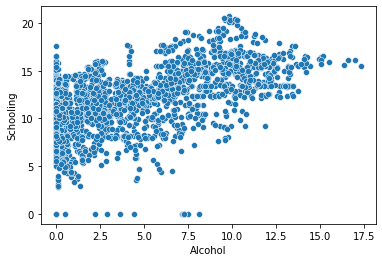

In [13]:
sns.scatterplot(data=data,x='Alcohol',y='Schooling')

In [14]:
# Imputing missing values of 'Alcohol' column 
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

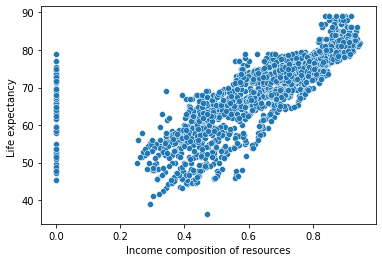

In [15]:
sns.scatterplot(data=data,x='Income composition of resources',y='Life expectancy ')

In [16]:
# Imputing missing values of ''Income composition of resources'' column 
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)


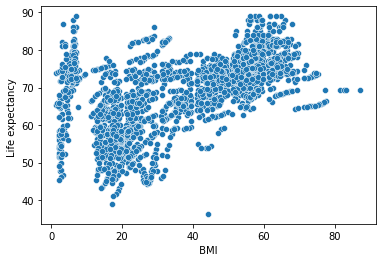

In [17]:
sns.scatterplot(data=data,x=' BMI ',y='Life expectancy ')

Creating a function for hadling outliers in certain columns.The function will calculate the z score of all the values in the passed column, if the zscore is greater than the threshold we replace it with the group(country) mean.

In [18]:
def outlier_replace(col):
    for i in countries:
        for j in groups.get_group(i)[col]:
            threshold = 3
            mean = np.mean(groups.get_group(i)[col])
            std = np.std(groups.get_group(i)[col])
            if std != 0:                     
                z_score = (j - mean) / std
                if np.abs(z_score) > threshold:
                    j = data[col][data['Country'] == i].mean()

The other columns, wer replaced by group mean.

If the number of null was less than 10 then the mean of the column was taken, or else, the mean of that value belonging to that country were taken.

In [19]:
data.dropna(subset=['Life expectancy '],inplace = True) 
countries = data['Country'].unique()

# we are creating groups of countries 

groups = data.groupby('Country')

# from the avialble data we know that values depends on country , 
# so we are going to handle the missing values and outliers of some columns  with respect to the country


# creating a new list contains gdp null values greater than 10.. this simply means that we cannot update the null with 
# the respective country mean .. 
gdpnull_c = []
for i in countries:
    if groups.get_group(i)['GDP'].isna().sum() >10:
        gdpnull_c.append(i)
        
        
        
# for countries with less gdp null then fill it with mean of gdp  values with respect to each country
for i in countries:
    if i not in gdpnull_c:
        for j in groups.get_group(i)['GDP']:
            data['GDP'][data['Country'] == i]= groups.get_group(i)['GDP'].fillna(groups.get_group(i)['GDP'].mean()) 
            
# for those countries null values more than 10 fill it with  mean of 'GDP'  of entire dataframe
for i in gdpnull_c:
    data['GDP'][data['Country'] == i]=groups.get_group(i)['GDP'].fillna(data['GDP'].mean())
    
# replacing outlier with mean of the rest values in the respective country:

outlier_replace('GDP')

# there are some countries for which we dont have the 15 years data.. so eventhough we did above steps, we may not replace
# null values of such coutries... 

# so , we are droping rest na values ( 5 rows)
data.dropna(subset=['GDP'],inplace = True) 

In [20]:
# hepatities     outlier  and null analysis

# same process in the case of gdp data handling ( refer )
countries = data['Country'].unique()
groups = data.groupby('Country')
gnull_c = []
for i in countries:
    if groups.get_group(i)['Hepatitis B'].isna().sum() >10:
        gnull_c.append(i)

In [21]:
# treating outlier 'Hepatitis B'values among countries which contain less number of nulls
outlier_replace('Hepatitis B') 

# we replace all null values by mean 'Hepatities B' of the corresponding countries ( countries not in gnull_c)    
for i in countries:
    if i not in gnull_c:
        for j in groups.get_group(i)['Hepatitis B']:
            data['Hepatitis B'][data['Country'] == i]= groups.get_group(i)['Hepatitis B'].fillna(groups.get_group(i)['Hepatitis B'].mean()) 
# for those countries in gnull_c we replace it with mean of 'Hepatitis B'  in the entire dataframe
for i in gnull_c:   
    data['Hepatitis B'][data['Country'] == i]=groups.get_group(i)['Hepatitis B'].fillna(data['Hepatitis B'].mean())

# same processing ( refer gdp data handling process)   
data.dropna(subset=['Hepatitis B'],inplace = True) 

In [22]:


gnull_c = []
for i in countries:
    if groups.get_group(i)['Total expenditure'].isna().sum() >10:
        gnull_c.append(i)

        
outlier_replace('Total expenditure') 


for i in countries:
    if i not in gnull_c:
        for j in groups.get_group(i)['Total expenditure']:
            data['Total expenditure'][data['Country'] == i]= groups.get_group(i)['Total expenditure'].fillna(groups.get_group(i)['Total expenditure'].mean()) 

for i in gnull_c:   
    data['Total expenditure'][data['Country'] == i]=groups.get_group(i)['Total expenditure'].fillna(data['Total expenditure'].mean())

data.dropna(subset=['Total expenditure'],inplace = True) 

## Further outlier removal and missing values

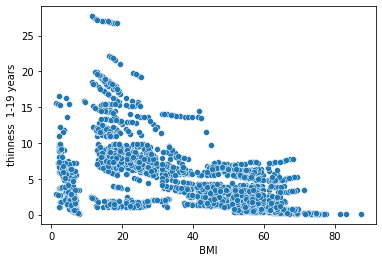

In [23]:
sns.scatterplot(x=' BMI ',y=' thinness  1-19 years',data=data)

In [24]:
# Another imputation technique

data = data.drop(' thinness 5-9 years',axis = 1)
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

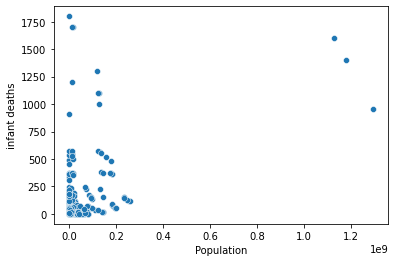

In [25]:
sns.scatterplot(x='Population',y='infant deaths',data=data)

In [26]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)

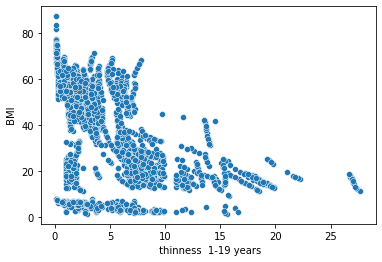

In [27]:
sns.scatterplot(data=data,x=' thinness  1-19 years',y=' BMI ')

In [28]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [29]:

countries = data['Country'].unique()
groups = data.groupby('Country')
gnull_c = []
for i in countries:
    if groups.get_group(i)['Polio'].isna().sum() >10:
        gnull_c.append(i)

outlier_replace('Polio') 

for i in countries:
    if i not in gnull_c:
        for j in groups.get_group(i)['Polio']:
            data['Polio'][data['Country'] == i]= groups.get_group(i)['Polio'].fillna(groups.get_group(i)['Polio'].mean()) 
for i in gnull_c:   
    data['Polio'][data['Country'] == i]=groups.get_group(i)['Polio'].fillna(data['Polio'].mean())
data.dropna(subset=['Polio'],inplace = True) 

In [30]:

countries = data['Country'].unique()
groups = data.groupby('Country')
gnull_c = []
for i in countries:
    if groups.get_group(i)['Diphtheria '].isna().sum() >10:
        gnull_c.append(i)

outlier_replace('Diphtheria ') 

for i in countries:
    if i not in gnull_c:
        for j in groups.get_group(i)['Diphtheria ']:
            data['Diphtheria '][data['Country'] == i]= groups.get_group(i)['Diphtheria '].fillna(groups.get_group(i)['Diphtheria '].mean())
            
            
for i in gnull_c:   
    data['Diphtheria '][data['Country'] == i]=groups.get_group(i)['Diphtheria '].fillna(data['Diphtheria '].mean())
data.dropna(subset=['Diphtheria '],inplace = True) 

In [31]:
life = data['Life expectancy ']

In [32]:
life

456     72.3
462     73.0
2172    74.6
2667    74.9
381     74.8
        ... 
1638    87.0
1095    56.7
1130    61.8
1294    79.9
860     59.4
Name: Life expectancy , Length: 2317, dtype: float64

## More Exploration 

Creating a dummy dataframe, so that the original dataframe doesnt get destroyed

In [33]:
dataplt = data
dataplt = dataplt.drop(['Status'],axis=1)
dataplt = dataplt.drop(['Country'],axis=1)

Dropping the categorical data

A pairplot, helps in understanding all the feature correlation in one single frame, which is useful for feature analysis.

In [34]:
#sns.pairplot(dataplt,palette='flare')

Boxplots are helpful in understanding outliers and central tendency

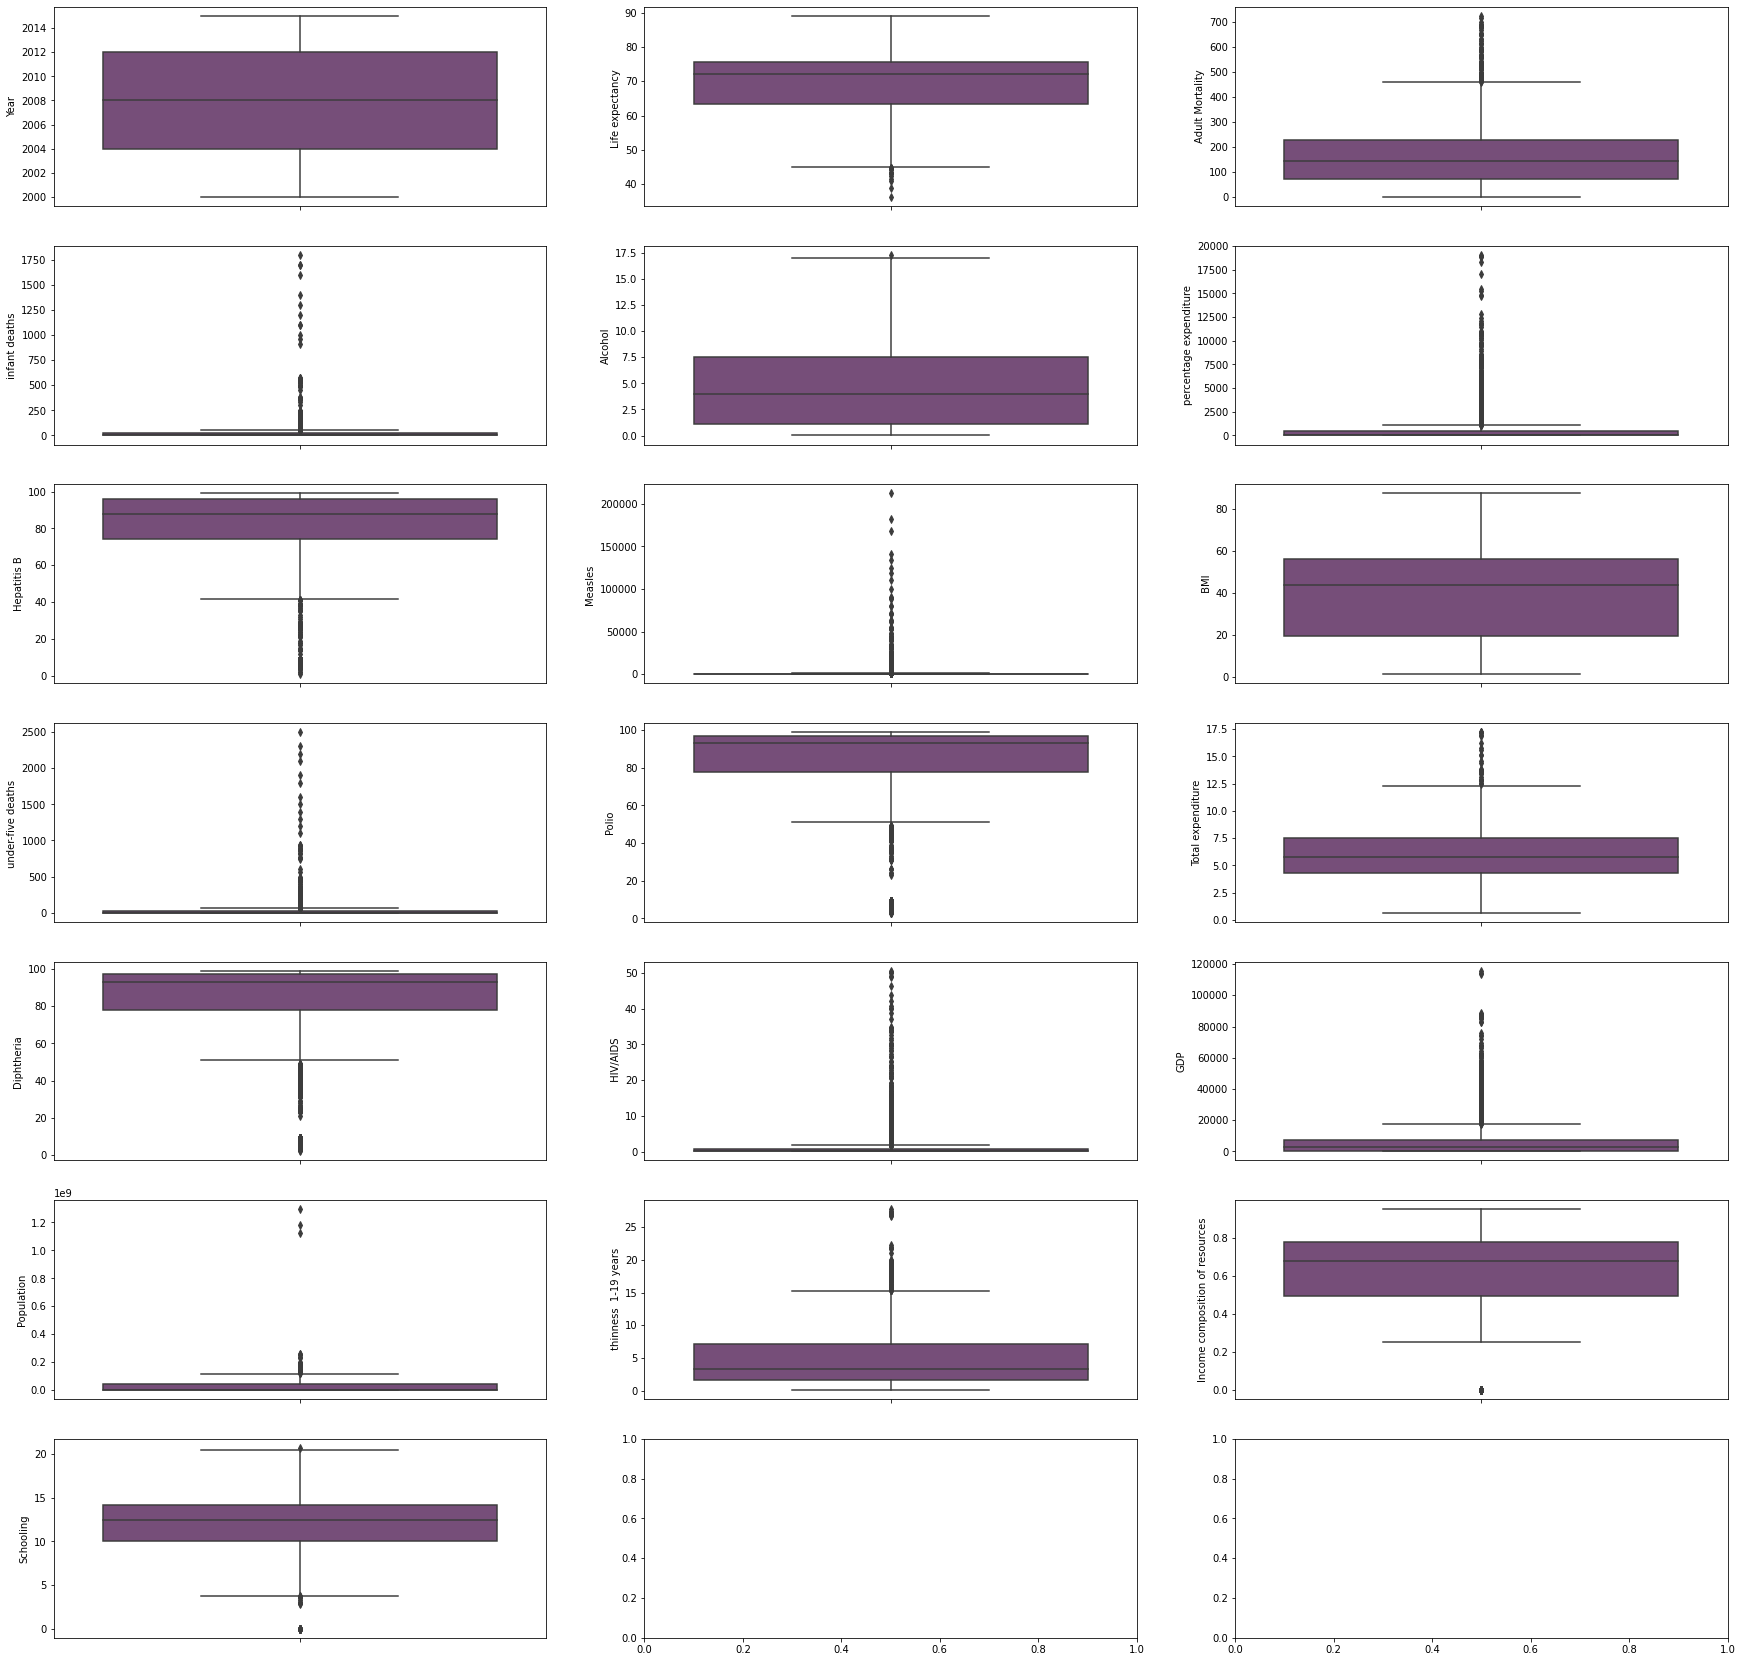

In [35]:
fig, axs = plt.subplots(ncols=3, nrows=7, figsize=(30, 30))
index = 0
axs = axs.flatten()
for k,v in dataplt.items():
    sns.boxplot(y=k, data=dataplt, ax=axs[index],color = '#7c4780')
    index += 1

We can see that there are many outliers, but since we have already done outlier detection, we can say these are true values, and dropping them can mess with data.

A distribution plot is helpful for analysing the distribution that a certain attribute holds.

Here we are looping through all the columns and making their distplot.

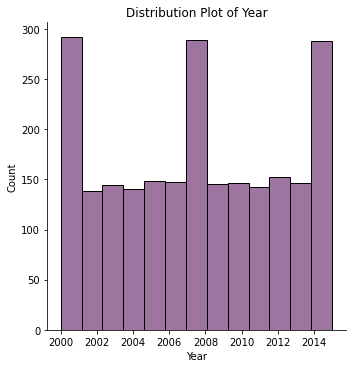

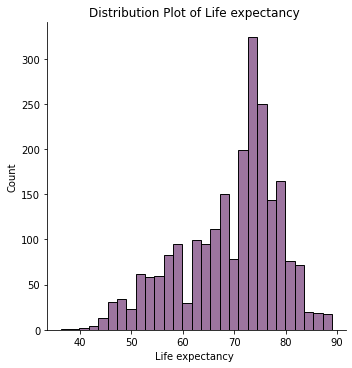

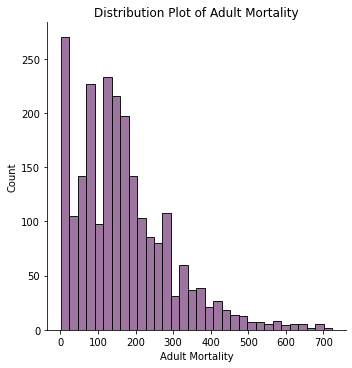

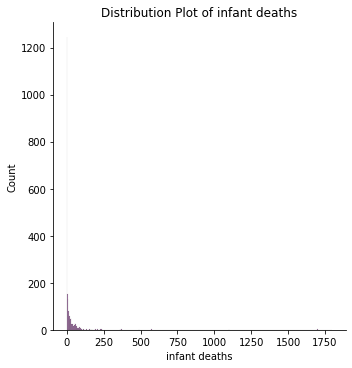

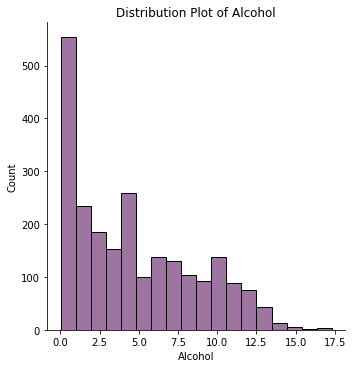

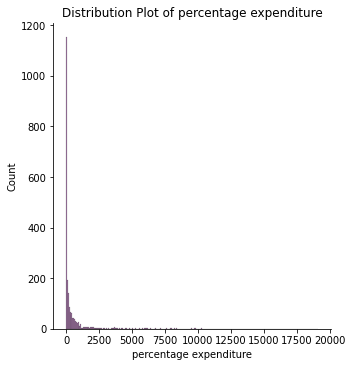

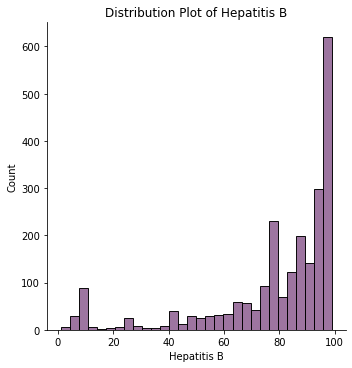

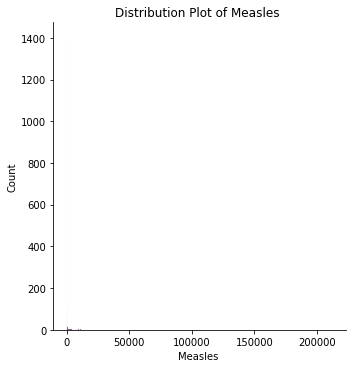

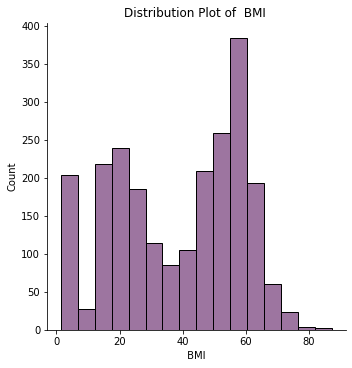

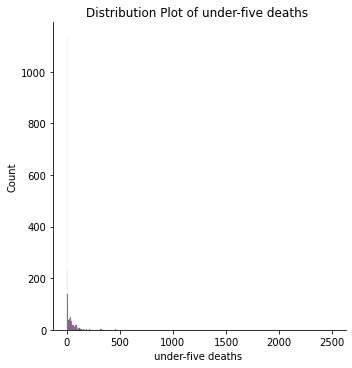

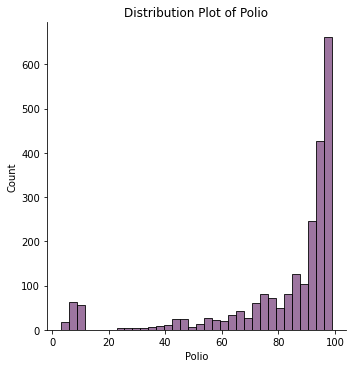

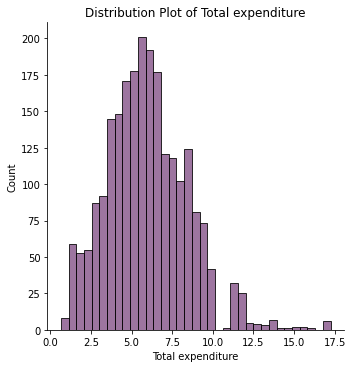

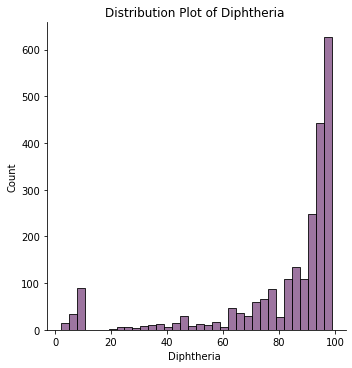

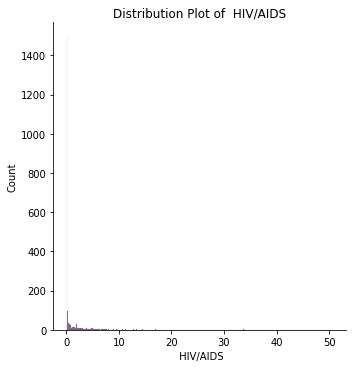

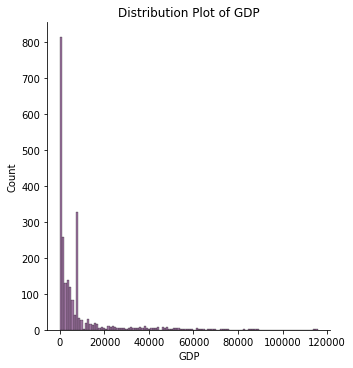

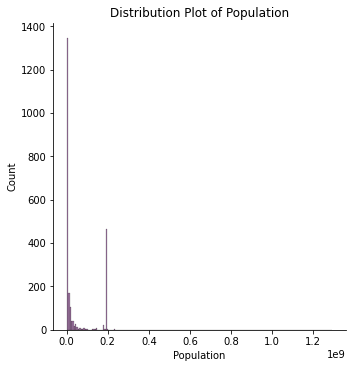

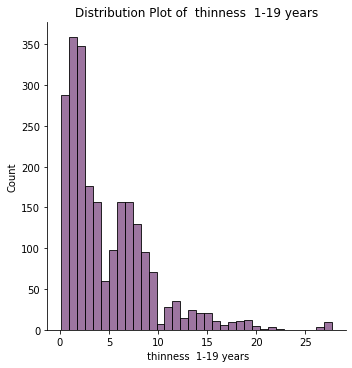

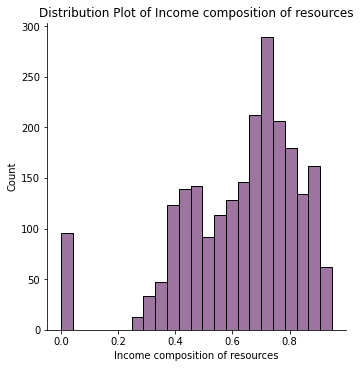

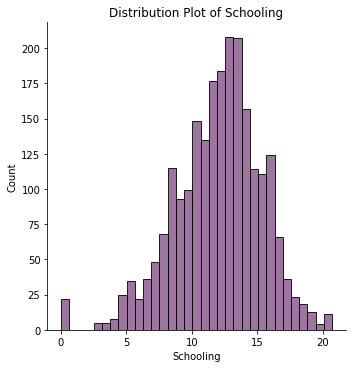

In [36]:
for cols in dataplt:
    sns.displot(dataplt[cols],color= '#7c4780')
    plt.title('Distribution Plot of '+cols)
    plt.show()

Plotting highly correlarted data

Income Composition and schooling

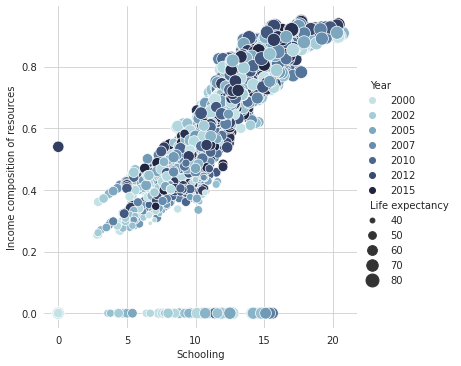

In [37]:
sns.set_style("whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=dataplt,
    color= '#7c4780',
    x="Schooling", y="Income composition of resources",
    hue="Year", size="Life expectancy ",
    palette=cmap, sizes=(10, 200),
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True) 

We can see a nice relation between both

Schooling and Life Expectancy:

This also follows a beautiful relationship, it can be thought that, since schooling increases awareness and hence awareness about health also increases, and hence the results

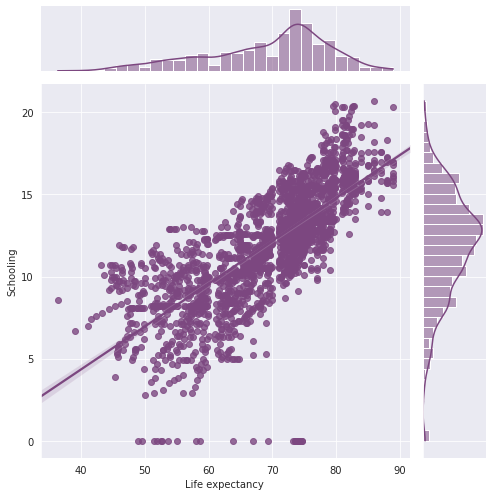

In [38]:
sns.set_style("darkgrid")

g = sns.jointplot(y="Schooling", x="Life expectancy ", data=dataplt,
                  kind="reg", truncate=False,
                  color="#7c4780", height=7)

Income Composition and Life expectancy

The linear relationship can be because, the with increasing in income, health facility become better and hence better life expectancy.

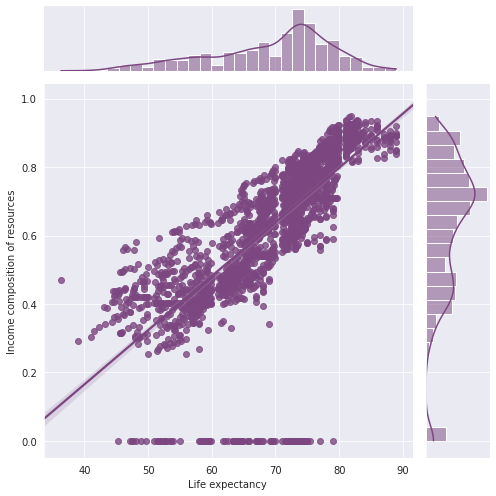

In [39]:

g = sns.jointplot(y="Income composition of resources", x="Life expectancy ", data=dataplt,
                  kind="reg", truncate=False,
                  color="#7c4780", height=7)

# Pre Model Data Processing

Dropping the categorical data.

And since dltk_ai can take upto 20 parameters, it is better to drop this column

In [40]:
## Applying scalar transformation 
data = data.drop('Country',axis = 1)

Dropping catergorical variable and target variable

In [41]:
I = data
from sklearn.preprocessing import MinMaxScaler
I = I.drop(['Status','Life expectancy '],axis = 1)

Using MinMax scaler to scale down the data to a normalized form

$x_i-min(x)/(max(x)-min(x)) $ 

In [42]:
scaler=MinMaxScaler()
scaler.fit(I)
scaled_data=scaler.transform(I)
scaled_data = pd.DataFrame(scaled_data)
life = np.array(data['Life expectancy '])[:,np.newaxis]
scaled_data['target'] = life
scaled_data.columns = ['Year','Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'Income composition of resources','Schooling','Life expectancy ']
data= scaled_data.copy()
data.to_csv('processed.csv',index=False)

<font color=blue> API key setup

We need to provide APIkey to connect to DLTK

In [43]:
# initialize dltk client with API key
client = dltk_ai.DltkAiClient('7dbbe2f4-3fb4-4a2a-95d3-1454bb6bc09e')

<font color=blue> Uploading training data

In [44]:
train_data_store_response = client.store('processed.csv', Dataset.TRAIN_DATA)
print(train_data_store_response)
train_data = train_data_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 63990007880190, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 's3Url': None, 'fileSize': 738440, 'fileName': 'processed.csv', 'label': 'Train_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']}, 'createdAt': '2020-12-11T03:21:20.007+00:00', 'updatedAt': '2020-12-11T03:21:20.007+00:00'}


Next step after uploading the dataset is to train a model using Train Dataset.

# <font color=red> Model One

## Creating Model

In [47]:
# Create ML Model
# Its a regression problem, where we need to predict  "Life Expectancy" which is a continous value
task = "regression"

# Library to use (scikit, weka, h2o)
library = 'weka'
algorithm = "LinearRegression"

removed_features =  ['Measles ', 'percentage expenditure',
                     'infant deaths','Diphtheria ', 'Total expenditure',
                     'Population'
                     'Hepatitis B']
np.random.seed(24)
# features to be used for training
feature = ['Adult Mortality',
       'Alcohol', ' BMI ',
       'under-five deaths ', 'Polio',
       ' HIV/AIDS', ' thinness  1-19 years', 'Schooling','Income composition of resources']  
# Label to predict
label = 'Life expectancy '
# Train-test split percentage
train_percentage = 90

# Save model 
save_model = 'true'
train_response = client.train(task,
                              algorithm,
                              train_data,
                              label,
                              feature,
                              "Life Expectancy Prediction Model",
                              library,
                              train_percentage,
                              save_model)
print(train_response)

{'code': 0, 'data': {'jobId': 3965, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2020-12-11T03:21:44.723+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'config': {'name': 'Life Expectancy Prediction Model', 'algorithm': 'LinearRegression', 'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 'label': 'Life expectancy ', 'trainPercentage': 90, 'features': ['Adult Mortality', 'Alcohol', ' BMI ', 'under-five deaths ', 'Polio', ' HIV/AIDS', ' thinness  1-19 years', 'Schooling', 'Income composition of resources'], 'saveModel': 'true', 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}}


## Training

In [48]:
train_job_status_response = client.job_status(train_response['data']['jobId'])
print(train_job_status_response)
print(json.dumps(train_job_status_response, indent=2))

{'jobId': 3965, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2020-12-11T03:21:44.723+00:00', 'endTime': '2020-12-11T03:21:45.070+00:00', 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}
{
  "jobId": 3965,
  "appId": 1606989056253,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2020-12-11T03:21:44.723+00:00",
  "endTime": "2020-12-11T03:21:45.070+00:00",
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null
}


In [49]:
# Model Evaluation Metrics
train_job_output_response = client.job_output(train_response['data']['jobId'])
train_job_output_response 

{'id': 3378,
 'jobId': 3965,
 'output': {'eval': {'errorRate': 3.9762284344507406,
   'pearsonCorrelation': {' BMI ': 0.5647040910949584,
    ' HIV/AIDS': -0.5540872482474196,
    ' thinness  1-19 years': -0.47637253838156673,
    'Adult Mortality': -0.6980967495684446,
    'Alcohol': 0.4016140679976538,
    'Income composition of resources': 0.7362210222741734,
    'Polio': 0.46299733026841516,
    'Schooling': 0.7542235157270054,
    'under-five deaths ': -0.22824557865601888}},
  'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607656903608_Life_Expectancy_Prediction_Model_6908957673885136256.mdl'}}

In [50]:
# Error rate if predictions are given based in mean of the target variable
print(data[label].mean())
print(data[label].std())

# here label is the target variable 

69.24130713211343
9.573003527108208


In [52]:
# load the predictions data set and preprocess it as per training
life_exp_predictions = preprocessor.read_csv('Life Expectancy Data test.csv',usecols= feature)
j = preprocessor.read_csv('Life Expectancy Data test.csv')
actual = j['Life expectancy ']

# further processing of predictions_data set  
scaler.fit(life_exp_predictions)
scaled_data_t=scaler.transform(life_exp_predictions)
life_exp_predictions= pd.DataFrame(scaled_data_t, columns = life_exp_predictions.columns)
life_exp_predictions.to_csv('life_exp_predictions.csv',index=False)

In [55]:
test_file_store_response = client.store('life_exp_predictions.csv', Dataset.TEST_DATA)
print(test_file_store_response)
test_data = test_file_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 31162633016955, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607656937853_life_exp_predictions.csv', 's3Url': None, 'fileSize': 46968, 'fileName': 'life_exp_predictions.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Adult Mortality', 'Alcohol', ' BMI ', 'under-five deaths ', 'Polio', ' HIV/AIDS', ' thinness  1-19 years', 'Income composition of resources', 'Schooling']}, 'createdAt': '2020-12-11T03:22:17.954+00:00', 'updatedAt': '2020-12-11T03:22:17.954+00:00'}


## Testing

In [56]:
# load the model built
model = train_job_output_response['output']['modelUrl']
model

'/dltk-ai-prod/users_id/687361782950394294/model/1607656903608_Life_Expectancy_Prediction_Model_6908957673885136256.mdl'

In [57]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model, library,features=feature)
predict_response

{'code': 0,
 'data': {'appId': 1606989056253,
  'endTime': None,
  'isJobStopped': None,
  'isStreamJob': False,
  'jobId': 3966,
  'jobType': 'CSV',
  'library': 'weka',
  'name': 'weka_regression_predict',
  'queryId': None,
  'request': {'config': {'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607656937853_life_exp_predictions.csv',
    'features': ['Adult Mortality',
     'Alcohol',
     ' BMI ',
     'under-five deaths ',
     'Polio',
     ' HIV/AIDS',
     ' thinness  1-19 years',
     'Schooling',
     'Income composition of resources'],
    'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607656903608_Life_Expectancy_Prediction_Model_6908957673885136256.mdl',
    'params': {}},
   'jobType': 'CSV',
   'library': 'weka',
   'queryId': None},
  'service': 'Regression',
  'startTime': '2020-12-11T03:22:26.356+00:00',
  'state': 'RUN',
  'task': 'PREDICT'}}

In [58]:
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'appId': 1606989056253,
 'endTime': '2020-12-11T03:22:26.797+00:00',
 'isJobStopped': None,
 'isStreamJob': False,
 'jobId': 3966,
 'jobType': 'CSV',
 'library': 'weka',
 'name': 'weka_regression_predict',
 'queryId': None,
 'service': 'Regression',
 'startTime': '2020-12-11T03:22:26.356+00:00',
 'state': 'FINISH',
 'task': 'PREDICT'}

In [59]:
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 3379,
 'jobId': 3966,
 'output': {'predFileUrl': '/dltk-ai-prod/users_id/687361782950394294/prediction/1607656945279_prediction1157081330803955753.csv',
  'reqId': 3966}}

In [60]:
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

In [61]:
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)
df = pd.read_csv(pred_data, sep=",")
df

,Adult Mortality,Alcohol,BMI,under-five deaths,Polio,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy,_score
0,0.170868,0.053751,0.647141,0.0050,0.833333,0.000000,0.232472,0.689057,0.439024,69.252299,69.252299
1,0.173669,0.278275,0.768480,0.0000,0.927083,0.000000,0.073801,0.825569,0.573171,73.981160,73.981160
2,0.550420,0.024636,0.199442,0.0400,0.000000,0.105991,0.357934,0.366197,0.109756,47.488738,47.488738
3,0.032213,0.049832,0.557880,0.0000,0.062500,0.000000,0.044280,0.503792,0.250000,63.163419,63.163419
4,0.191877,0.270997,0.051604,0.0070,0.937500,0.004608,0.040590,0.758397,0.548780,70.393818,70.393818
...,...,...,...,...,...,...,...,...,...,...,...
317,0.261905,0.061030,0.617852,0.0000,0.947917,0.000000,0.040590,0.533044,0.310976,65.158605,65.158605
318,0.263305,0.372340,0.647141,0.0000,0.989583,0.000000,0.125461,0.760563,0.506098,70.871432,70.871432
319,0.469188,0.053751,0.170153,0.0045,0.947917,0.029954,0.339483,0.438787,0.067073,54.585690,54.585690
320,0.261905,0.354983,0.506276,0.0000,0.895833,0.011521,0.225092,0.813651,0.493902,69.858017,69.858017


In [62]:
# creating a dataframe for comparing model predictions and actual value
actual_predicted = pd.DataFrame(df['Life expectancy '])
actual_predicted['actual'] = actual
actual_predicted.columns = ['model_prediction', 'actual']
actual_predicted

,model_prediction,actual
0,69.252299,73.7
1,73.981160,74.2
2,47.488738,49.6
3,63.163419,67.4
4,70.393818,73.9
...,...,...
317,65.158605,68.3
318,70.871432,69.4
319,54.585690,59.7
320,69.858017,69.6


In [63]:
# for regression problems we use R^2 metric 
# using sklearn packagge for calculating r^2 value
from sklearn.metrics import r2_score 
r2_score(actual,df['_score'])

0.7954380611464097

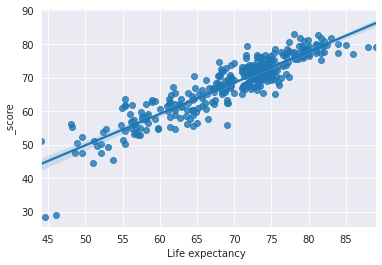

In [64]:
sns.regplot(x=actual,y=df['_score'])

# <font color=red> Model Two 

## Creating Model

In [65]:
# Create ML Model
# Its a regression problem, where we need to predict  "Life Expectancy" which is a continous value
task = "regression"

# Library to use (scikit, weka, h2o)
library = 'weka'
algorithm = "RandomForest"

removed_features =  ['percentage expenditure',
                     
                     'Population','Hepatitis B'
                    ]
np.random.seed(42)
# features to be used for training
features = ['Adult Mortality',
       'Alcohol', ' BMI ',
       'under-five deaths ', 'Polio',
       ' HIV/AIDS', ' thinness  1-19 years', 'infant deaths','Schooling','Total expenditure','Measles ','Diphtheria ','Income composition of resources']  
# Label to predict
label = 'Life expectancy '
# Train-test split percentage
train_percentage = 80

# Save model 
save_model = 'true'
train_response = client.train(task,
                              algorithm,
                              train_data,
                              label,
                              features,
                              "Life Expectancy Prediction Model",
                              library,
                              train_percentage,
                              save_model)
print(train_response)

{'code': 0, 'data': {'jobId': 3967, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2020-12-11T03:22:59.070+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'config': {'name': 'Life Expectancy Prediction Model', 'algorithm': 'RandomForest', 'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 'label': 'Life expectancy ', 'trainPercentage': 80, 'features': ['Adult Mortality', 'Alcohol', ' BMI ', 'under-five deaths ', 'Polio', ' HIV/AIDS', ' thinness  1-19 years', 'infant deaths', 'Schooling', 'Total expenditure', 'Measles ', 'Diphtheria ', 'Income composition of resources'], 'saveModel': 'true', 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}}


## Training

<font color=blue>Checking training status</font>

As training a model might take lot of time depending on size of dataset, we can check current status of model training using below functions

In [66]:
train_job_status_response = client.job_status(train_response['data']['jobId'])
print(train_job_status_response)
print(json.dumps(train_job_status_response, indent=2))

{'jobId': 3967, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2020-12-11T03:22:59.070+00:00', 'endTime': '2020-12-11T03:23:02.097+00:00', 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}
{
  "jobId": 3967,
  "appId": 1606989056253,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2020-12-11T03:22:59.070+00:00",
  "endTime": "2020-12-11T03:23:02.097+00:00",
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null
}


In [67]:
# Model Evaluation Metrics
train_job_output_response = client.job_output(train_response['data']['jobId'])
train_job_output_response

{'id': 3380,
 'jobId': 3967,
 'output': {'eval': {'errorRate': 0.73105133492558,
   'pearsonCorrelation': {' BMI ': 0.5658258274606467,
    ' HIV/AIDS': -0.5579175686022138,
    ' thinness  1-19 years': -0.4723951213979978,
    'Adult Mortality': -0.6867786092101066,
    'Alcohol': 0.4082534787430934,
    'Diphtheria ': 0.4612745294977045,
    'Income composition of resources': 0.7379359664871304,
    'Measles ': -0.16453197575111364,
    'Polio': 0.44467416359325274,
    'Schooling': 0.7523566087497043,
    'Total expenditure': 0.21484778960810824,
    'infant deaths': -0.20888501960754752,
    'under-five deaths ': -0.23541341432536342}},
  'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607656980188_Life_Expectancy_Prediction_Model_8731222956881176146.mdl'}}

In [68]:
# Error rate if predictions are given based in mean of the target variable
print(data[label].mean())
print(data[label].std())

# here label is the target variable 

69.24130713211343
9.573003527108208


In [69]:
# load the predictions data set and preprocess it as per training
life_exp_predictions = preprocessor.read_csv('Life Expectancy Data test.csv',usecols= features)
j = preprocessor.read_csv('Life Expectancy Data test.csv')
actual = j['Life expectancy ']

In [70]:
# further processing of predictions_data set  

In [71]:
scaler.fit(life_exp_predictions)
scaled_data_t=scaler.transform(life_exp_predictions)
life_exp_predictions= pd.DataFrame(scaled_data_t, columns = life_exp_predictions.columns)
life_exp_predictions.to_csv('life_exp_predictions.csv',index=False)

In [72]:
life_exp_predictions.head()

,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
0,0.170868,0.005333,0.053751,0.003933,0.647141,0.005,0.833333,0.269402,0.031915,0.000000,0.232472,0.689057,0.439024
1,0.173669,0.000000,0.278275,0.000000,0.768480,0.000,0.927083,0.533452,0.925532,0.000000,0.073801,0.825569,0.573171
2,0.550420,0.030667,0.024636,0.000479,0.199442,0.040,0.000000,0.192685,0.148936,0.105991,0.357934,0.366197,0.109756
3,0.032213,0.000000,0.049832,0.000000,0.557880,0.000,0.062500,0.630687,0.893617,0.000000,0.044280,0.503792,0.250000
4,0.191877,0.007333,0.270997,0.000008,0.051604,0.007,0.937500,0.354148,0.936170,0.004608,0.040590,0.758397,0.548780


In [73]:
# Upload test dataset
test_file_store_response = client.store('life_exp_predictions.csv', Dataset.TEST_DATA)
print(test_file_store_response)
test_data = test_file_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 79252156697184, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607656987657_life_exp_predictions.csv', 's3Url': None, 'fileSize': 68914, 'fileName': 'life_exp_predictions.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Adult Mortality', 'infant deaths', 'Alcohol', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', 'Income composition of resources', 'Schooling']}, 'createdAt': '2020-12-11T03:23:07.754+00:00', 'updatedAt': '2020-12-11T03:23:07.754+00:00'}


## Testing

In [74]:
# load the model built
model = train_job_output_response['output']['modelUrl']
model

'/dltk-ai-prod/users_id/687361782950394294/model/1607656980188_Life_Expectancy_Prediction_Model_8731222956881176146.mdl'

In [75]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model, library)
predict_response

{'code': 0,
 'data': {'appId': 1606989056253,
  'endTime': None,
  'isJobStopped': None,
  'isStreamJob': False,
  'jobId': 3968,
  'jobType': 'CSV',
  'library': 'weka',
  'name': 'weka_regression_predict',
  'queryId': None,
  'request': {'config': {'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607656987657_life_exp_predictions.csv',
    'features': [],
    'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607656980188_Life_Expectancy_Prediction_Model_8731222956881176146.mdl',
    'params': {}},
   'jobType': 'CSV',
   'library': 'weka',
   'queryId': None},
  'service': 'Regression',
  'startTime': '2020-12-11T03:23:10.262+00:00',
  'state': 'RUN',
  'task': 'PREDICT'}}

In [76]:
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'appId': 1606989056253,
 'endTime': '2020-12-11T03:23:11.212+00:00',
 'isJobStopped': None,
 'isStreamJob': False,
 'jobId': 3968,
 'jobType': 'CSV',
 'library': 'weka',
 'name': 'weka_regression_predict',
 'queryId': None,
 'service': 'Regression',
 'startTime': '2020-12-11T03:23:10.262+00:00',
 'state': 'FINISH',
 'task': 'PREDICT'}

In [77]:
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 3381,
 'jobId': 3968,
 'output': {'predFileUrl': '/dltk-ai-prod/users_id/687361782950394294/prediction/1607656989721_prediction3725552812349560946.csv',
  'reqId': 3968}}

In [78]:
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

In [79]:
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)
df = pd.read_csv(pred_data, sep=",")
df

,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy,_score
0,0.170868,0.005333,0.053751,0.003933,0.647141,0.0050,0.833333,0.269402,0.031915,0.000000,0.232472,0.689057,0.439024,71.698860,71.698860
1,0.173669,0.000000,0.278275,0.000000,0.768480,0.0000,0.927083,0.533452,0.925532,0.000000,0.073801,0.825569,0.573171,75.039978,75.039978
2,0.550420,0.030667,0.024636,0.000479,0.199442,0.0400,0.000000,0.192685,0.148936,0.105991,0.357934,0.366197,0.109756,51.596340,51.596340
3,0.032213,0.000000,0.049832,0.000000,0.557880,0.0000,0.062500,0.630687,0.893617,0.000000,0.044280,0.503792,0.250000,67.723914,67.723914
4,0.191877,0.007333,0.270997,0.000008,0.051604,0.0070,0.937500,0.354148,0.936170,0.004608,0.040590,0.758397,0.548780,74.146787,74.146787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.261905,0.000000,0.061030,0.000000,0.617852,0.0000,0.947917,0.598573,0.042553,0.000000,0.040590,0.533044,0.310976,67.891946,67.891946
318,0.263305,0.000000,0.372340,0.000000,0.647141,0.0000,0.989583,0.418376,0.989362,0.000000,0.125461,0.760563,0.506098,71.401051,71.401051
319,0.469188,0.004667,0.053751,0.000974,0.170153,0.0045,0.947917,0.226583,0.946809,0.029954,0.339483,0.438787,0.067073,59.103393,59.103393
320,0.261905,0.000000,0.354983,0.000000,0.506276,0.0000,0.895833,0.332739,0.925532,0.011521,0.225092,0.813651,0.493902,70.122186,70.122186


In [80]:
# creating a dataframe for comparing model predictions and actual value
actual_predicted = pd.DataFrame(df['Life expectancy '])
actual_predicted['actual'] = actual
actual_predicted.columns = ['model_prediction', 'actual']
actual_predicted

,model_prediction,actual
0,71.698860,73.7
1,75.039978,74.2
2,51.596340,49.6
3,67.723914,67.4
4,74.146787,73.9
...,...,...
317,67.891946,68.3
318,71.401051,69.4
319,59.103393,59.7
320,70.122186,69.6


In [81]:
# for regression problems we use R^2 metric 
# using sklearn packagge for calculating r^2 value
from sklearn.metrics import r2_score 
r2_score(actual,df['_score']) 

0.9494861514474349

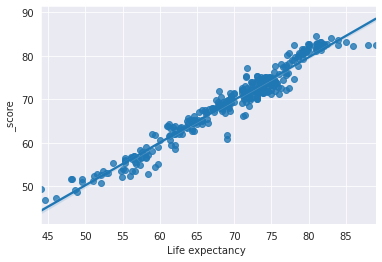

In [82]:
sns.regplot(x=actual,y=df['_score'])



# <font color=red> Model Three

## Creating Model

In [83]:
# Create ML Model
# Its a regression problem, where we need to predict  "Life Expectancy" which is a continous value
task = "regression"

# Library to use (scikit, weka, h2o)
library = 'weka'
algorithm = "RandomForest"

removed_features =  ['Measles ', 'percentage expenditure',
                     'infant deaths','Diphtheria ', 'Total expenditure',
                     'Population'
                     'Hepatitis B']
np.random.seed(42)
# features to be used for training
features = ['Income composition of resources', 
            'Schooling',
            ' thinness  1-19 years',
            ' HIV/AIDS',
            'Adult Mortality']  
# Label to predict
label = 'Life expectancy '
# Train-test split percentage
train_percentage = 95

# Save model 
save_model = True
train_response = client.train(task,
                              algorithm,
                              train_data,
                              label,
                              features,
                              "Life Expectancy Prediction Model",
                              library,
                              train_percentage,
                              save_model)
print(train_response)

{'code': 0, 'data': {'jobId': 3969, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2020-12-11T03:23:18.937+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'config': {'name': 'Life Expectancy Prediction Model', 'algorithm': 'RandomForest', 'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 'label': 'Life expectancy ', 'trainPercentage': 95, 'features': ['Income composition of resources', 'Schooling', ' thinness  1-19 years', ' HIV/AIDS', 'Adult Mortality'], 'saveModel': True, 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}}


## Training

In [84]:
train_job_status_response = client.job_status(train_response['data']['jobId'])
print(train_job_status_response)
print(json.dumps(train_job_status_response, indent=2))

{'jobId': 3969, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2020-12-11T03:23:18.937+00:00', 'endTime': '2020-12-11T03:23:21.839+00:00', 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}
{
  "jobId": 3969,
  "appId": 1606989056253,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2020-12-11T03:23:18.937+00:00",
  "endTime": "2020-12-11T03:23:21.839+00:00",
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null
}


In [85]:
# Model Evaluation Metrics
train_job_output_response = client.job_output(train_response['data']['jobId'])
train_job_output_response

{'id': 3382,
 'jobId': 3969,
 'output': {'eval': {'errorRate': 0.6778864890057051,
   'pearsonCorrelation': {' HIV/AIDS': -0.5560867915277459,
    ' thinness  1-19 years': -0.4742657392046746,
    'Adult Mortality': -0.700517611257753,
    'Income composition of resources': 0.7322001889134965,
    'Schooling': 0.7468873592451739}},
  'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607656999888_Life_Expectancy_Prediction_Model_226862678955986573.mdl'}}

In [86]:
# Error rate if predictions are given based in mean of the target variable
print(data[label].mean())
print(data[label].std())

# here label is the target variable 

69.24130713211343
9.573003527108208


In [87]:
# load the predictions data set and preprocess it as per training
life_exp_predictions = preprocessor.read_csv('Life Expectancy Data test.csv',usecols= features)
j = preprocessor.read_csv('Life Expectancy Data test.csv')
actual = j['Life expectancy ']

# further processing of predictions_data set  
scaler.fit(life_exp_predictions)
scaled_data_t=scaler.transform(life_exp_predictions)
life_exp_predictions= pd.DataFrame(scaled_data_t, columns = life_exp_predictions.columns)
life_exp_predictions.to_csv('life_exp_predictions.csv',index=False)

In [88]:
# Upload test dataset
test_file_store_response = client.store('life_exp_predictions.csv', Dataset.TEST_DATA)
print(test_file_store_response)
test_data = test_file_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 62733776325569, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657007157_life_exp_predictions.csv', 's3Url': None, 'fileSize': 28172, 'fileName': 'life_exp_predictions.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Adult Mortality', ' HIV/AIDS', ' thinness  1-19 years', 'Income composition of resources', 'Schooling']}, 'createdAt': '2020-12-11T03:23:27.231+00:00', 'updatedAt': '2020-12-11T03:23:27.231+00:00'}


## Testing

In [89]:
# load the model built
model = train_job_output_response['output']['modelUrl']
model

'/dltk-ai-prod/users_id/687361782950394294/model/1607656999888_Life_Expectancy_Prediction_Model_226862678955986573.mdl'

In [90]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model, library)
predict_response

{'code': 0,
 'data': {'appId': 1606989056253,
  'endTime': None,
  'isJobStopped': None,
  'isStreamJob': False,
  'jobId': 3970,
  'jobType': 'CSV',
  'library': 'weka',
  'name': 'weka_regression_predict',
  'queryId': None,
  'request': {'config': {'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657007157_life_exp_predictions.csv',
    'features': [],
    'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607656999888_Life_Expectancy_Prediction_Model_226862678955986573.mdl',
    'params': {}},
   'jobType': 'CSV',
   'library': 'weka',
   'queryId': None},
  'service': 'Regression',
  'startTime': '2020-12-11T03:23:29.736+00:00',
  'state': 'RUN',
  'task': 'PREDICT'}}

In [91]:
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'appId': 1606989056253,
 'endTime': '2020-12-11T03:23:30.690+00:00',
 'isJobStopped': None,
 'isStreamJob': False,
 'jobId': 3970,
 'jobType': 'CSV',
 'library': 'weka',
 'name': 'weka_regression_predict',
 'queryId': None,
 'service': 'Regression',
 'startTime': '2020-12-11T03:23:29.736+00:00',
 'state': 'FINISH',
 'task': 'PREDICT'}

In [92]:
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 3383,
 'jobId': 3970,
 'output': {'predFileUrl': '/dltk-ai-prod/users_id/687361782950394294/prediction/1607657009198_prediction6614556163860297582.csv',
  'reqId': 3970}}

In [93]:
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

In [94]:
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)
df = pd.read_csv(pred_data, sep=",")
df

,Adult Mortality,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy,_score
0,0.170868,0.000000,0.232472,0.689057,0.439024,73.503218,73.503218
1,0.173669,0.000000,0.073801,0.825569,0.573171,75.131432,75.131432
2,0.550420,0.105991,0.357934,0.366197,0.109756,52.551512,52.551512
3,0.032213,0.000000,0.044280,0.503792,0.250000,65.147105,65.147105
4,0.191877,0.004608,0.040590,0.758397,0.548780,74.272406,74.272406
...,...,...,...,...,...,...,...
317,0.261905,0.000000,0.040590,0.533044,0.310976,66.243861,66.243861
318,0.263305,0.000000,0.125461,0.760563,0.506098,70.682181,70.682181
319,0.469188,0.029954,0.339483,0.438787,0.067073,56.782533,56.782533
320,0.261905,0.011521,0.225092,0.813651,0.493902,70.152371,70.152371


In [95]:
# creating a dataframe for comparing model predictions and actual value
actual_predicted = pd.DataFrame(df['Life expectancy '])
actual_predicted['actual'] = actual
actual_predicted.columns = ['model_prediction', 'actual']
actual_predicted

,model_prediction,actual
0,73.503218,73.7
1,75.131432,74.2
2,52.551512,49.6
3,65.147105,67.4
4,74.272406,73.9
...,...,...
317,66.243861,68.3
318,70.682181,69.4
319,56.782533,59.7
320,70.152371,69.6


In [96]:
# for regression problems we use R^2 metric 
# using sklearn packagge for calculating r^2 value
from sklearn.metrics import r2_score 
r2_score(actual,df['_score']) 

0.9535801444908933

In [97]:
actual_predicted.columns

Index(['model_prediction', 'actual'], dtype='object')

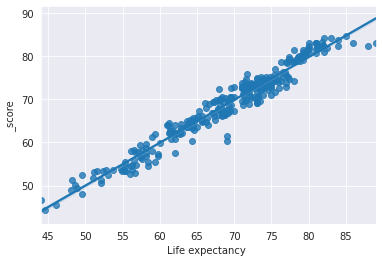

In [98]:
sns.regplot(x=actual,y=df['_score'])

# <font color=red> Model Four

## Creating Model

In [99]:
# Create ML Model
# Its a regression problem, where we need to predict  "Life Expectancy" which is a continous value
task = "regression"

# Library to use (scikit, weka, h2o)
library = 'weka'
algorithm = "RandomForest"

removed_features =  ['Measles ', 
                     'percentage expenditure',
                     'infant deaths',
                     'Diphtheria ', 
                     'Total expenditure',
                     'Population',
                     ' HIV/AIDS', 
                     'Schooling',
                     'Hepatitis B']
np.random.seed(42)
# features to be used for training
features = ['Adult Mortality',
       'Alcohol', ' BMI ',
       'under-five deaths ', 'Polio',
        ' thinness  1-19 years','Income composition of resources']  
# Label to predict
label = 'Life expectancy '
# Train-test split percentage
train_percentage = 80

# Save model 
save_model = True
train_response = client.train(task,
                              algorithm,
                              train_data,
                              label,
                              features,
                              "Life Expectancy Prediction Model1",
                              library,
                              train_percentage,
                              save_model)
print(train_response)

{'code': 0, 'data': {'jobId': 3971, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2020-12-11T03:23:37.748+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'config': {'name': 'Life Expectancy Prediction Model1', 'algorithm': 'RandomForest', 'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 'label': 'Life expectancy ', 'trainPercentage': 80, 'features': ['Adult Mortality', 'Alcohol', ' BMI ', 'under-five deaths ', 'Polio', ' thinness  1-19 years', 'Income composition of resources'], 'saveModel': True, 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}}


## Training

<font color=blue>Checking training status</font>

In [100]:
train_job_status_response = client.job_status(train_response['data']['jobId'])
print(train_job_status_response)
print(json.dumps(train_job_status_response, indent=2))

{'jobId': 3971, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2020-12-11T03:23:37.748+00:00', 'endTime': '2020-12-11T03:23:40.673+00:00', 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}
{
  "jobId": 3971,
  "appId": 1606989056253,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2020-12-11T03:23:37.748+00:00",
  "endTime": "2020-12-11T03:23:40.673+00:00",
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null
}


In [101]:
# Model Evaluation Metrics
train_job_output_response = client.job_output(train_response['data']['jobId'])
train_job_output_response 

{'id': 3384,
 'jobId': 3971,
 'output': {'eval': {'errorRate': 0.6551695311287996,
   'pearsonCorrelation': {' BMI ': 0.5809142701468532,
    ' thinness  1-19 years': -0.4801609571878442,
    'Adult Mortality': -0.7067519200294575,
    'Alcohol': 0.41290690807075175,
    'Income composition of resources': 0.7404036829749285,
    'Polio': 0.45513072831071943,
    'under-five deaths ': -0.21746033300712092}},
  'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607657018872_Life_Expectancy_Prediction_Model1_2700913801768115774.mdl'}}

In [102]:
# Error rate if predictions are given based in mean of the target variable
print(data[label].mean())
print(data[label].std())

# here label is the target variable 

69.24130713211343
9.573003527108208


In [103]:
# load the predictions data set and preprocess it as per training
life_exp_predictions = preprocessor.read_csv('Life Expectancy Data test.csv',usecols= features)
j = preprocessor.read_csv('Life Expectancy Data test.csv')
actual = j['Life expectancy ']

# further processing of predictions_data set  
scaler.fit(life_exp_predictions)
scaled_data_t=scaler.transform(life_exp_predictions)
life_exp_predictions= pd.DataFrame(scaled_data_t, columns = life_exp_predictions.columns)
life_exp_predictions.to_csv('life_exp_predictions.csv',index=False)

In [104]:
test_file_store_response = client.store('life_exp_predictions.csv', Dataset.TEST_DATA)
print(test_file_store_response)
test_data = test_file_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 61216457446392, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657026115_life_exp_predictions.csv', 's3Url': None, 'fileSize': 37410, 'fileName': 'life_exp_predictions.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Adult Mortality', 'Alcohol', ' BMI ', 'under-five deaths ', 'Polio', ' thinness  1-19 years', 'Income composition of resources']}, 'createdAt': '2020-12-11T03:23:46.214+00:00', 'updatedAt': '2020-12-11T03:23:46.214+00:00'}


## Testing

In [105]:
# load the model built
model = train_job_output_response['output']['modelUrl']
model

'/dltk-ai-prod/users_id/687361782950394294/model/1607657018872_Life_Expectancy_Prediction_Model1_2700913801768115774.mdl'

In [106]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model, library,features=features)
predict_response

{'code': 0,
 'data': {'appId': 1606989056253,
  'endTime': None,
  'isJobStopped': None,
  'isStreamJob': False,
  'jobId': 3972,
  'jobType': 'CSV',
  'library': 'weka',
  'name': 'weka_regression_predict',
  'queryId': None,
  'request': {'config': {'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657026115_life_exp_predictions.csv',
    'features': ['Adult Mortality',
     'Alcohol',
     ' BMI ',
     'under-five deaths ',
     'Polio',
     ' thinness  1-19 years',
     'Income composition of resources'],
    'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607657018872_Life_Expectancy_Prediction_Model1_2700913801768115774.mdl',
    'params': {}},
   'jobType': 'CSV',
   'library': 'weka',
   'queryId': None},
  'service': 'Regression',
  'startTime': '2020-12-11T03:23:48.689+00:00',
  'state': 'RUN',
  'task': 'PREDICT'}}

In [107]:
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'appId': 1606989056253,
 'endTime': '2020-12-11T03:23:49.600+00:00',
 'isJobStopped': None,
 'isStreamJob': False,
 'jobId': 3972,
 'jobType': 'CSV',
 'library': 'weka',
 'name': 'weka_regression_predict',
 'queryId': None,
 'service': 'Regression',
 'startTime': '2020-12-11T03:23:48.689+00:00',
 'state': 'FINISH',
 'task': 'PREDICT'}

In [108]:
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 3385,
 'jobId': 3972,
 'output': {'predFileUrl': '/dltk-ai-prod/users_id/687361782950394294/prediction/1607657028114_prediction6963637816133211211.csv',
  'reqId': 3972}}

In [109]:
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

In [110]:
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)
df = pd.read_csv(pred_data, sep=",")
df

,Adult Mortality,Alcohol,BMI,under-five deaths,Polio,thinness 1-19 years,Income composition of resources,Life expectancy,_score
0,0.170868,0.053751,0.647141,0.0050,0.833333,0.232472,0.689057,73.417448,73.417448
1,0.173669,0.278275,0.768480,0.0000,0.927083,0.073801,0.825569,75.417512,75.417512
2,0.550420,0.024636,0.199442,0.0400,0.000000,0.357934,0.366197,52.004370,52.004370
3,0.032213,0.049832,0.557880,0.0000,0.062500,0.044280,0.503792,67.511587,67.511587
4,0.191877,0.270997,0.051604,0.0070,0.937500,0.040590,0.758397,74.192333,74.192333
...,...,...,...,...,...,...,...,...,...
317,0.261905,0.061030,0.617852,0.0000,0.947917,0.040590,0.533044,68.485244,68.485244
318,0.263305,0.372340,0.647141,0.0000,0.989583,0.125461,0.760563,70.652565,70.652565
319,0.469188,0.053751,0.170153,0.0045,0.947917,0.339483,0.438787,59.038926,59.038926
320,0.261905,0.354983,0.506276,0.0000,0.895833,0.225092,0.813651,70.745913,70.745913


In [111]:
# creating a dataframe for comparing model predictions and actual value
actual_predicted = pd.DataFrame(df['Life expectancy '])
actual_predicted['actual'] = actual
actual_predicted.columns = ['model_prediction', 'actual']
actual_predicted

,model_prediction,actual
0,73.417448,73.7
1,75.417512,74.2
2,52.004370,49.6
3,67.511587,67.4
4,74.192333,73.9
...,...,...
317,68.485244,68.3
318,70.652565,69.4
319,59.038926,59.7
320,70.745913,69.6


In [112]:
# for regression problems we use R^2 metric 
# using sklearn packagge for calculating r^2 value
from sklearn.metrics import r2_score 
r2_score(actual,df['_score'])

0.962142599298509

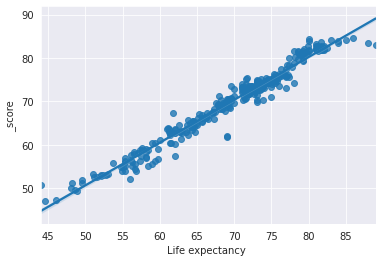

In [113]:
sns.regplot(x=actual,y=df['_score'])

# <font color=red> Model Five

## Creating Model

In [114]:
# Create ML Model
# Its a regression problem, where we need to predict  "Life Expectancy" which is a continous value
task = "regression"

# Library to use (scikit, weka, h2o)
library = 'weka'
algorithm = "RandomForest"

removed_features =  [ 
                   'Total expenditure','Schooling','under-five deaths ', ' BMI ', 'Polio', 'Measles ' 
                   , 'Population', 'percentage expenditure'
                     ]
np.random.seed(24)
# features to be used for training


features = ['Adult Mortality','Hepatitis B',' thinness  1-19 years',
            ' HIV/AIDS','Diphtheria ','Income composition of resources','infant deaths'
       , 'Alcohol'] 


# Label to predict
label = 'Life expectancy '
# Train-test split percentage
train_percentage = 90

# Save model 
save_model = 'true'
train_response = client.train(task,
                              algorithm,
                              train_data,
                              label,
                              features,
                              "Life Expectancy Prediction Model",
                              library,
                              train_percentage,
                              save_model)
print(train_response)

{'code': 0, 'data': {'jobId': 3973, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2020-12-11T03:23:56.943+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'config': {'name': 'Life Expectancy Prediction Model', 'algorithm': 'RandomForest', 'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 'label': 'Life expectancy ', 'trainPercentage': 90, 'features': ['Adult Mortality', 'Hepatitis B', ' thinness  1-19 years', ' HIV/AIDS', 'Diphtheria ', 'Income composition of resources', 'infant deaths', 'Alcohol'], 'saveModel': 'true', 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}}


## Training

In [115]:
train_job_status_response = client.job_status(train_response['data']['jobId'])
print(train_job_status_response)
print(json.dumps(train_job_status_response, indent=2))

{'jobId': 3973, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2020-12-11T03:23:56.943+00:00', 'endTime': '2020-12-11T03:23:59.900+00:00', 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}
{
  "jobId": 3973,
  "appId": 1606989056253,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2020-12-11T03:23:56.943+00:00",
  "endTime": "2020-12-11T03:23:59.900+00:00",
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null
}


In [116]:
# Model Evaluation Metrics
train_job_output_response = client.job_output(train_response['data']['jobId'])
train_job_output_response 

{'id': 3386,
 'jobId': 3973,
 'output': {'eval': {'errorRate': 0.7335195952714876,
   'pearsonCorrelation': {' HIV/AIDS': -0.5689260364649092,
    ' thinness  1-19 years': -0.48412314686464053,
    'Adult Mortality': -0.709904697856843,
    'Alcohol': 0.394812114822382,
    'Diphtheria ': 0.45609445270124377,
    'Hepatitis B': 0.25696728432651006,
    'Income composition of resources': 0.7428510728689244,
    'infant deaths': -0.21020610337509213}},
  'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607657037967_Life_Expectancy_Prediction_Model_1705130175529513465.mdl'}}

In [117]:
# Error rate if predictions are given based in mean of the target variable
print(data[label].mean())
print(data[label].std())

# here label is the target variable 

69.24130713211343
9.573003527108208


In [118]:
# load the predictions data set and preprocess it as per training
life_exp_predictions = preprocessor.read_csv('Life Expectancy Data test.csv',usecols= features)
j = preprocessor.read_csv('Life Expectancy Data test.csv')
actual = j['Life expectancy ']

# further processing of predictions_data set  
scaler.fit(life_exp_predictions)
scaled_data_t=scaler.transform(life_exp_predictions)
life_exp_predictions= pd.DataFrame(scaled_data_t, columns = life_exp_predictions.columns)
life_exp_predictions.to_csv('life_exp_predictions.csv',index=False)

In [119]:
test_file_store_response = client.store('life_exp_predictions.csv', Dataset.TEST_DATA)
print(test_file_store_response)
test_data = test_file_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 21634675417833, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657045462_life_exp_predictions.csv', 's3Url': None, 'fileSize': 44505, 'fileName': 'life_exp_predictions.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', 'Income composition of resources']}, 'createdAt': '2020-12-11T03:24:05.556+00:00', 'updatedAt': '2020-12-11T03:24:05.556+00:00'}


## Testing

In [120]:
# load the model built
model = train_job_output_response['output']['modelUrl']
model

'/dltk-ai-prod/users_id/687361782950394294/model/1607657037967_Life_Expectancy_Prediction_Model_1705130175529513465.mdl'

In [121]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model, library,features=features)
predict_response

{'code': 0,
 'data': {'appId': 1606989056253,
  'endTime': None,
  'isJobStopped': None,
  'isStreamJob': False,
  'jobId': 3974,
  'jobType': 'CSV',
  'library': 'weka',
  'name': 'weka_regression_predict',
  'queryId': None,
  'request': {'config': {'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657045462_life_exp_predictions.csv',
    'features': ['Adult Mortality',
     'Hepatitis B',
     ' thinness  1-19 years',
     ' HIV/AIDS',
     'Diphtheria ',
     'Income composition of resources',
     'infant deaths',
     'Alcohol'],
    'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607657037967_Life_Expectancy_Prediction_Model_1705130175529513465.mdl',
    'params': {}},
   'jobType': 'CSV',
   'library': 'weka',
   'queryId': None},
  'service': 'Regression',
  'startTime': '2020-12-11T03:24:08.054+00:00',
  'state': 'RUN',
  'task': 'PREDICT'}}

In [122]:
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'appId': 1606989056253,
 'endTime': '2020-12-11T03:24:08.910+00:00',
 'isJobStopped': None,
 'isStreamJob': False,
 'jobId': 3974,
 'jobType': 'CSV',
 'library': 'weka',
 'name': 'weka_regression_predict',
 'queryId': None,
 'service': 'Regression',
 'startTime': '2020-12-11T03:24:08.054+00:00',
 'state': 'FINISH',
 'task': 'PREDICT'}

In [123]:
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 3387,
 'jobId': 3974,
 'output': {'predFileUrl': '/dltk-ai-prod/users_id/687361782950394294/prediction/1607657047433_prediction2453394182721578983.csv',
  'reqId': 3974}}

In [124]:
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

In [125]:
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)
df = pd.read_csv(pred_data, sep=",")
df

,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Life expectancy,_score
0,0.170868,0.005333,0.053751,0.835052,0.031915,0.000000,0.232472,0.689057,73.492993,73.492993
1,0.173669,0.000000,0.278275,0.072165,0.925532,0.000000,0.073801,0.825569,75.515333,75.515333
2,0.550420,0.030667,0.024636,0.154639,0.148936,0.105991,0.357934,0.366197,51.842299,51.842299
3,0.032213,0.000000,0.049832,0.835052,0.893617,0.000000,0.044280,0.503792,66.855132,66.855132
4,0.191877,0.007333,0.270997,0.938144,0.936170,0.004608,0.040590,0.758397,74.478384,74.478384
...,...,...,...,...,...,...,...,...,...,...
317,0.261905,0.000000,0.061030,0.072165,0.042553,0.000000,0.040590,0.533044,67.388211,67.388211
318,0.263305,0.000000,0.372340,0.989691,0.989362,0.000000,0.125461,0.760563,70.802893,70.802893
319,0.469188,0.004667,0.053751,0.948454,0.946809,0.029954,0.339483,0.438787,59.415533,59.415533
320,0.261905,0.000000,0.354983,0.896907,0.925532,0.011521,0.225092,0.813651,70.544832,70.544832


In [126]:
# creating a dataframe for comparing model predictions and actual value
actual_predicted = pd.DataFrame(df['Life expectancy '])
actual_predicted['actual'] = actual
actual_predicted.columns = ['model_prediction', 'actual']
actual_predicted

,model_prediction,actual
0,73.492993,73.7
1,75.515333,74.2
2,51.842299,49.6
3,66.855132,67.4
4,74.478384,73.9
...,...,...
317,67.388211,68.3
318,70.802893,69.4
319,59.415533,59.7
320,70.544832,69.6


In [127]:
# for regression problems we use R^2 metric 
# using sklearn packagge for calculating r^2 value
from sklearn.metrics import r2_score 
r2_score(actual,df['_score'])

0.9673519085487334

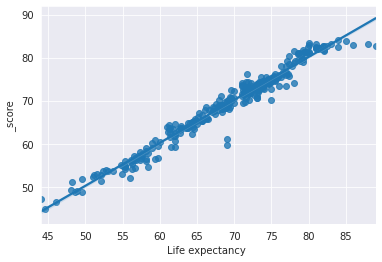

In [128]:
sns.regplot(x=actual,y=df['_score'])

# <font color=red> Model Six

## Creating Model

In [129]:
# Create ML Model
# Its a regression problem, where we need to predict  "Life Expectancy" which is a continous value
task = "regression"

# Library to use (scikit, weka, h2o)
library = 'weka'
algorithm = "RandomForest"

removed_features =  [ 
                   'Total expenditure','Schooling','under-five deaths ', ' BMI ', 'Measles ' 
                   ,  'percentage expenditure','Population'
                     ]
np.random.seed(24)
# features to be used for training


features = ['Adult Mortality','Hepatitis B',' thinness  1-19 years','Year','under-five deaths ','Polio',
            ' HIV/AIDS','Diphtheria ','Income composition of resources','infant deaths', 'Alcohol'] 


# Label to predict
label = 'Life expectancy '
# Train-test split percentage
train_percentage = 90

# Save model 
save_model = 'true'
train_response = client.train(task,
                              algorithm,
                              train_data,
                              label,
                              features,
                              "Life Expectancy Prediction Model",
                              library,
                              train_percentage,
                              save_model)
print(train_response)

{'code': 0, 'data': {'jobId': 3975, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2020-12-11T03:24:17.498+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'config': {'name': 'Life Expectancy Prediction Model', 'algorithm': 'RandomForest', 'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Train_Data/1607656879861_processed.csv', 'label': 'Life expectancy ', 'trainPercentage': 90, 'features': ['Adult Mortality', 'Hepatitis B', ' thinness  1-19 years', 'Year', 'under-five deaths ', 'Polio', ' HIV/AIDS', 'Diphtheria ', 'Income composition of resources', 'infant deaths', 'Alcohol'], 'saveModel': 'true', 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}}


## Training

In [130]:
train_job_status_response = client.job_status(train_response['data']['jobId'])
print(train_job_status_response)
print(json.dumps(train_job_status_response, indent=2))

{'jobId': 3975, 'appId': 1606989056253, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2020-12-11T03:24:17.498+00:00', 'endTime': '2020-12-11T03:24:20.279+00:00', 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None}
{
  "jobId": 3975,
  "appId": 1606989056253,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2020-12-11T03:24:17.498+00:00",
  "endTime": "2020-12-11T03:24:20.279+00:00",
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isJobStopped": null
}


In [131]:
# Model Evaluation Metrics
train_job_output_response = client.job_output(train_response['data']['jobId'])
train_job_output_response 

{'id': 3388,
 'jobId': 3975,
 'output': {'eval': {'errorRate': 0.7101930426644459,
   'pearsonCorrelation': {' HIV/AIDS': -0.5608125290095429,
    ' thinness  1-19 years': -0.47253391902239267,
    'Adult Mortality': -0.7049609899306654,
    'Alcohol': 0.3947911824159368,
    'Diphtheria ': 0.45663187839715896,
    'Hepatitis B': 0.24017941823263766,
    'Income composition of resources': 0.7338858382105308,
    'Polio': 0.4470798594112831,
    'Year': 0.1673220122637558,
    'infant deaths': -0.19860756907410176,
    'under-five deaths ': -0.22449459913972264}},
  'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607657058535_Life_Expectancy_Prediction_Model_1047311005888344234.mdl'}}

In [132]:
# Error rate if predictions are given based in mean of the target variable
print(data[label].mean())
print(data[label].std())

# here label is the target variable 

69.24130713211343
9.573003527108208


In [133]:
# load the predictions data set and preprocess it as per training
life_exp_predictions = preprocessor.read_csv('Life Expectancy Data test.csv',usecols= features)
j = preprocessor.read_csv('Life Expectancy Data test.csv')
actual = j['Life expectancy ']

# further processing of predictions_data set  
scaler.fit(life_exp_predictions)
scaled_data_t=scaler.transform(life_exp_predictions)
life_exp_predictions= pd.DataFrame(scaled_data_t, columns = life_exp_predictions.columns)
life_exp_predictions.to_csv('life_exp_predictions.csv',index=False)

In [134]:
test_file_store_response = client.store('life_exp_predictions.csv', Dataset.TEST_DATA)
print(test_file_store_response)
test_data = test_file_store_response['fileUrl']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 32923878204228, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657065898_life_exp_predictions.csv', 's3Url': None, 'fileSize': 56453, 'fileName': 'life_exp_predictions.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'metadata': {'attributes': ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', 'Income composition of resources']}, 'createdAt': '2020-12-11T03:24:25.992+00:00', 'updatedAt': '2020-12-11T03:24:25.992+00:00'}


## Testing

In [135]:
# load the model built
model = train_job_output_response['output']['modelUrl']
model

'/dltk-ai-prod/users_id/687361782950394294/model/1607657058535_Life_Expectancy_Prediction_Model_1047311005888344234.mdl'

In [136]:
# Predict using created ML Model
predict_response = client.predict(task, test_data, model, library,features=features)
predict_response

{'code': 0,
 'data': {'appId': 1606989056253,
  'endTime': None,
  'isJobStopped': None,
  'isStreamJob': False,
  'jobId': 3976,
  'jobType': 'CSV',
  'library': 'weka',
  'name': 'weka_regression_predict',
  'queryId': None,
  'request': {'config': {'datasetUrl': '/dltk-ai-prod/users_id/687361782950394294/Test_Data/1607657065898_life_exp_predictions.csv',
    'features': ['Adult Mortality',
     'Hepatitis B',
     ' thinness  1-19 years',
     'Year',
     'under-five deaths ',
     'Polio',
     ' HIV/AIDS',
     'Diphtheria ',
     'Income composition of resources',
     'infant deaths',
     'Alcohol'],
    'modelUrl': '/dltk-ai-prod/users_id/687361782950394294/model/1607657058535_Life_Expectancy_Prediction_Model_1047311005888344234.mdl',
    'params': {}},
   'jobType': 'CSV',
   'library': 'weka',
   'queryId': None},
  'service': 'Regression',
  'startTime': '2020-12-11T03:24:28.474+00:00',
  'state': 'RUN',
  'task': 'PREDICT'}}

In [137]:
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'appId': 1606989056253,
 'endTime': '2020-12-11T03:24:29.342+00:00',
 'isJobStopped': None,
 'isStreamJob': False,
 'jobId': 3976,
 'jobType': 'CSV',
 'library': 'weka',
 'name': 'weka_regression_predict',
 'queryId': None,
 'service': 'Regression',
 'startTime': '2020-12-11T03:24:28.474+00:00',
 'state': 'FINISH',
 'task': 'PREDICT'}

In [138]:
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 3389,
 'jobId': 3976,
 'output': {'predFileUrl': '/dltk-ai-prod/users_id/687361782950394294/prediction/1607657067877_prediction2378926411654699303.csv',
  'reqId': 3976}}

In [139]:
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

In [140]:
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)
df = pd.read_csv(pred_data, sep=",")
df

,Year,Adult Mortality,infant deaths,Alcohol,Hepatitis B,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Life expectancy,_score
0,0.428571,0.170868,0.005333,0.053751,0.835052,0.0050,0.833333,0.031915,0.000000,0.232472,0.689057,73.143532,73.143532
1,0.500000,0.173669,0.000000,0.278275,0.072165,0.0000,0.927083,0.925532,0.000000,0.073801,0.825569,75.247954,75.247954
2,0.571429,0.550420,0.030667,0.024636,0.154639,0.0400,0.000000,0.148936,0.105991,0.357934,0.366197,51.902646,51.902646
3,0.357143,0.032213,0.000000,0.049832,0.835052,0.0000,0.062500,0.893617,0.000000,0.044280,0.503792,66.944603,66.944603
4,0.571429,0.191877,0.007333,0.270997,0.938144,0.0070,0.937500,0.936170,0.004608,0.040590,0.758397,74.191404,74.191404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.714286,0.261905,0.000000,0.061030,0.072165,0.0000,0.947917,0.042553,0.000000,0.040590,0.533044,68.262166,68.262166
318,0.857143,0.263305,0.000000,0.372340,0.989691,0.0000,0.989583,0.989362,0.000000,0.125461,0.760563,70.691565,70.691565
319,0.428571,0.469188,0.004667,0.053751,0.948454,0.0045,0.947917,0.946809,0.029954,0.339483,0.438787,59.767847,59.767847
320,0.428571,0.261905,0.000000,0.354983,0.896907,0.0000,0.895833,0.925532,0.011521,0.225092,0.813651,70.944777,70.944777


In [141]:
# creating a dataframe for comparing model predictions and actual value
actual_predicted = pd.DataFrame(df['Life expectancy '])
actual_predicted['actual'] = actual
actual_predicted.columns = ['model_prediction', 'actual']
actual_predicted

,model_prediction,actual
0,73.143532,73.7
1,75.247954,74.2
2,51.902646,49.6
3,66.944603,67.4
4,74.191404,73.9
...,...,...
317,68.262166,68.3
318,70.691565,69.4
319,59.767847,59.7
320,70.944777,69.6


In [142]:
# for regression problems we use R^2 metric 
# using sklearn packagge for calculating r^2 value
from sklearn.metrics import r2_score 
r2_score(actual,df['_score'])

0.9702330510703981

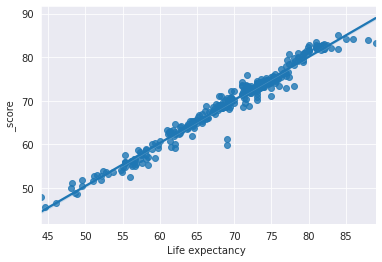

In [143]:
sns.regplot(x=actual,y=df['_score'])

# Summary

First, the dataset was cleaned and scaled. For scaling min-max scaler was used.

All the outliers were removed, using three different techniques, imputation, grouped mean and dropping.
Specific attributes were found to be highly correlated to the target variable, which was 'Life Expectancy'. 

Models were built by tweaking the parameters, to receive the highest accuracy.
The highest accuracy reached was 97.02% on test data.
